 ## Data Analysis of Indian Start up Ecosystem

### Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.

### Project Description:
This project aims to analyze funding trends in the Indian start-up ecosystem from 2018 to 2021. By examining data on funding received by start-ups and investor profiles, we seek to gain insights into the dynamics of the ecosystem and identify factors influencing funding trends. The ultimate goal is to provide recommendations for stakeholders interested in the Indian start-up market.


### Questions
-What is the location with most start ups

-What is the distribution of funding per city/location

-Which sector received the most funding/investment

-What is the most common investment type

-What is the number of start ups per funding year


### Hypothesis
H0: Technology Sector received the most investment

HA: Technology Sector does not received the most investment



## Data Understanding

### Importing all necessary packages

In [561]:
# importing  libraries
import pyodbc 
from dotenv import dotenv_values 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import seaborn
from scipy import stats 
import os 
import seaborn as sns
import numpy as np
import re

warnings.filterwarnings('ignore')


In [562]:
# loading environment variables
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [563]:
connection = pyodbc.connect(connection_string)

In [564]:
# Loading dataset 1 & 2

query1 = "select * from dbo.LP1_startup_funding2020" 
data1 = pd.read_sql(query1, connection)

query2 = "select * from dbo.LP1_startup_funding2021" 
data2 = pd.read_sql(query2, connection)

### Read Data

In [565]:
## display first five rows of the data set
data1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [566]:
data1.shape

(1055, 10)

In [567]:
# checking data info 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [568]:
# dropping column 10 from dataset
data1 = data1.drop('column10', axis=1)

In [569]:
# Adding column funding_year
data1['funding_year']=2020

In [570]:
data1.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,funding_year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020


In [571]:
# rename columns
data1.rename(columns={'Company_Brand':'CompanyName', 'What_it_does': 'AboutCompany'}, inplace=True)

In [572]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CompanyName   1055 non-null   object 
 1   Founded       842 non-null    float64
 2   HeadQuarter   961 non-null    object 
 3   Sector        1042 non-null   object 
 4   AboutCompany  1055 non-null   object 
 5   Founders      1043 non-null   object 
 6   Investor      1017 non-null   object 
 7   Amount        801 non-null    float64
 8   Stage         591 non-null    object 
 9   funding_year  1055 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 82.5+ KB


In [573]:
data2.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [574]:
data2.shape

(1209, 9)

In [575]:
# checking data info
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [576]:
data2['funding_year']=2021

In [577]:
data2.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,funding_year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021


In [578]:
# Rename columns
data2.rename(columns={'Company_Brand':'CompanyName', 'What_it_does': 'AboutCompany'}, inplace=True)

In [579]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CompanyName   1209 non-null   object 
 1   Founded       1208 non-null   float64
 2   HeadQuarter   1208 non-null   object 
 3   Sector        1209 non-null   object 
 4   AboutCompany  1209 non-null   object 
 5   Founders      1205 non-null   object 
 6   Investor      1147 non-null   object 
 7   Amount        1206 non-null   object 
 8   Stage         781 non-null    object 
 9   funding_year  1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [580]:
# loading dataset 2018
data3= pd.read_csv('./startup_funding/startup_funding2018.csv',low_memory=False)

data3.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [581]:
data3.shape

(526, 6)

In [582]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [583]:
# renaming cloumns for uniformity 
data3.rename(columns={'Industry': 'Sector', 'Company Name':'CompanyName', 'Round/Series': 'Stage', 'About Company': 'AboutCompany','Location': 'HeadQuarter'}, inplace=True)

In [584]:
data3['funding_year']=2018

In [585]:
data3.head(2)

,CompanyName,Sector,Stage,Amount,HeadQuarter,AboutCompany,funding_year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018


In [586]:
# Loading dataset 2019
data4= pd.read_csv('./startup_funding/startup_funding2019.csv',low_memory=False)

data4.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [587]:
data4.shape

(89, 9)

In [588]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [589]:
data4.rename(columns={'Amount($)': 'Amount', 'Company/Brand':'CompanyName', 'What it does': 'AboutCompany'}, inplace=True)

In [590]:
data4['funding_year']= 2019

In [591]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CompanyName   89 non-null     object 
 1   Founded       60 non-null     float64
 2   HeadQuarter   70 non-null     object 
 3   Sector        84 non-null     object 
 4   AboutCompany  89 non-null     object 
 5   Founders      86 non-null     object 
 6   Investor      89 non-null     object 
 7   Amount        89 non-null     object 
 8   Stage         43 non-null     object 
 9   funding_year  89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [594]:
# merging dataset
df = pd.concat([data1, data2, data3, data4])

df.to_csv('aba.csv')

df.head(2)

,CompanyName,Founded,HeadQuarter,Sector,AboutCompany,Founders,Investor,Amount,Stage,funding_year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020


### exploratory data analysis

In [596]:
# checking the size of the dataframe
df.shape

(2879, 10)

In [597]:
# Checking datatype and entries 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CompanyName   2879 non-null   object 
 1   Founded       2110 non-null   float64
 2   HeadQuarter   2765 non-null   object 
 3   Sector        2861 non-null   object 
 4   AboutCompany  2879 non-null   object 
 5   Founders      2334 non-null   object 
 6   Investor      2253 non-null   object 
 7   Amount        2622 non-null   object 
 8   Stage         1941 non-null   object 
 9   funding_year  2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 247.4+ KB


In [598]:
# Changing column to lower string
df.columns = df.columns.str.lower()

In [599]:
df.head(1)

,companyname,founded,headquarter,sector,aboutcompany,founders,investor,amount,stage,funding_year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020


In [600]:
#checking for null values
df.isnull().sum()

companyname       0
founded         769
headquarter     114
sector           18
aboutcompany      0
founders        545
investor        626
amount          257
stage           938
funding_year      0
dtype: int64

In [601]:
df.rename(columns={'founded':'yearfounded'}, inplace=True)

In [602]:
df.head(2)

,companyname,yearfounded,headquarter,sector,aboutcompany,founders,investor,amount,stage,funding_year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020


In [603]:
df.duplicated().sum()

23

In [604]:
df.drop_duplicates(inplace=True)

In [642]:
#Checking description of dataset
df.describe()

,yearfounded,amount,funding_year
count,2088.000000,2.856000e+03,2856.000000
mean,2016.067050,9.840941e+07,2020.017857
std,4.368211,3.097961e+09,1.087759
min,1963.000000,7.200000e+02,2018.000000
25%,2015.000000,1.000000e+06,2020.000000
50%,2017.000000,3.000000e+06,2020.000000
75%,2019.000000,8.000000e+06,2021.000000
max,2021.000000,1.500000e+11,2021.000000


### observations
The average amount invested is about 98Million with maximum amount in excess of 150Billion.The max amount was invested in 2021

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   companyname   2856 non-null   object 
 1   yearfounded   2088 non-null   float64
 2   headquarter   2742 non-null   object 
 3   sector        2838 non-null   object 
 4   aboutcompany  2856 non-null   object 
 5   founders      2312 non-null   object 
 6   investor      2232 non-null   object 
 7   amount        2600 non-null   object 
 8   stage         1927 non-null   object 
 9   funding_year  2856 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 245.4+ KB


### EDA

### Cleaning amount column

### assumption

conversion rate of 1 INR = 0.012 USD to convert rupees to dollars

In [606]:

# Function to clean amount values
def floater(string):
    try:
        string = float(string)
    except ValueError:
        string = np.nan
   
    return string
   
def clean_amount(amount):    
    if isinstance(amount, str):
        # Convert to lowercase
        amount = amount.lower()
       
        # Remove any spaces
        amount = amount.replace(' ', '')
       
        # Remove commas
        amount = amount.replace(',', '')
       
        if amount == '' or amount == '—':
            amount = np.nan
         #if the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of 1 INR = 0.012 USD
        elif '₹' in amount:
            amount = amount.replace('₹', '')
            amount = floater(amount) * 0.012
       
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in amount:
            amount = amount.replace('$', '')
            amount = floater(amount)
        else:
            amount = floater(amount)
 
   
    return amount
 

In [607]:
df['amount']=[clean_amount(amount) for amount in df['amount']]

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   companyname   2856 non-null   object 
 1   yearfounded   2088 non-null   float64
 2   headquarter   2742 non-null   object 
 3   sector        2838 non-null   object 
 4   aboutcompany  2856 non-null   object 
 5   founders      2312 non-null   object 
 6   investor      2232 non-null   object 
 7   amount        2293 non-null   float64
 8   stage         1927 non-null   object 
 9   funding_year  2856 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 245.4+ KB


In [609]:
#variable for  an amount to fill in null values
median_amount = df['amount'].median()

df['amount'].fillna(median_amount, inplace =True)

In [610]:
df['amount']

0        200000.0
1        100000.0
2       3000000.0
3        400000.0
4        340000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: amount, Length: 2856, dtype: float64

### Cleaning Stage Column

In [611]:
df['stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', '$1200000', 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', '$300000', 'Early seed', '$6000000',
       '$1000000', 'Seies A', 'Series A2', 'Series I', 'Angel',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt'

In [612]:

# Function to remove website link from stage column
def remove_website_link(value):
    # Regular expression pattern to match website URLs that begin with http:// or https:// with an optional www
    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'
   
    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    else:
        return value

In [613]:
df['stage']=df['stage'].apply(remove_website_link)

### cleaning other columns

In [614]:

# Identify rows where 'investor' value is numeric using clean amount function
mask = df['investor'].apply(lambda x: pd.notna(clean_amount(x)))
 
# Update 'stage' column with the 'amount' value if stage is NaN
stage_mask = df['stage'].isna()
df.loc[mask & stage_mask, 'stage']    = df.loc[mask, 'amount']
 
# Update 'amount' column with 'investor' value
df.loc[mask, 'amount']                = df.loc[mask, 'investor']
 
# Set 'investor' to NaN
df.loc[mask, 'investor']              = np.nan
         
 

In [615]:

# Identify rows where 'stage' value is numeric using clean amount function
mask = df['stage'].apply(lambda x: pd.notna(clean_amount(x)))
 
# Update the 'what_it_does' column to its concatenation with 'founder' value
old_what_it_does = df.loc[mask, 'aboutcompany']
old_founder      = df.loc[mask, 'founders']
 
df.loc[mask, 'aboutcompany']    = old_what_it_does.fillna('') + ' ' + old_founder.fillna('')
 
# Update 'founder' column using the old 'investor' value
df.loc[mask, 'founders']        = df.loc[mask, 'investor']
 
# Update 'investor' column using the old 'amount' value
df.loc[mask, 'investor']        = df.loc[mask, 'amount']
 
# Update 'amount' column using the old 'stage' value
df.loc[mask, 'amount']          = df.loc[mask, 'stage']
 
# Set 'stage' to NaN
df.loc[mask, 'stage']           = np.nan

In [616]:
df['amount']=[clean_amount(amount) for amount in df['amount']]

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   companyname   2856 non-null   object 
 1   yearfounded   2088 non-null   float64
 2   headquarter   2742 non-null   object 
 3   sector        2838 non-null   object 
 4   aboutcompany  2856 non-null   object 
 5   founders      2309 non-null   object 
 6   investor      2231 non-null   object 
 7   amount        2856 non-null   float64
 8   stage         1921 non-null   object 
 9   funding_year  2856 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 245.4+ KB


In [618]:
df['stage'].unique()


array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', nan, 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', 'Early seed', 'Seies A', 'Series A2',
       'Series I', 'Angel', 'Private Equity', 'Venture - Series Unknown',
       'Grant', 'Debt Financing', 'Post-IPO Debt', 'Corporate Round',
       'Undisclosed', 'Secon

In [619]:
df.isna().sum()

companyname       0
yearfounded     768
headquarter     114
sector           18
aboutcompany      0
founders        547
investor        625
amount            0
stage           935
funding_year      0
dtype: int64

In [620]:
#variable for sector to fill in null values
mode_sector = df['sector'].mode()[0]

df['sector'].fillna(mode_sector, inplace =True)

### categorizing Sector

In [622]:
import re

def sector_redistribution(sector):
    if re.search(r'bank|finance|crypto|Credit|B2B|E-Commerce|Ecommerce|E-commerce|Trading Platform|Financial Services|Lending|Marketplace|Mobile Payments|Finance|MLOPs platform|Escrow|Crowdsourcing|Mutual Funds|Insurance technology|Insurance Technology|Virtual Banking|E-marketplace|Financial Services|Banking|Insurance Technology|Marketing|Financial Services|Payments|Insurance|InsurTech|Credit Cards|E-c', sector, re.IGNORECASE):
        return 'Finance'
    elif re.search(r'Computer|Information Services|FinTech|Information Technology & Services|Infratech|Cybersecurity|Safety tech|Robotics & AI|Edtech|edtech|Telecommunication|FinTech|Tech Startup|Tech company|Apps|Semiconductor|Network Security|Computer Vision|Developer Platform|Enterprise Software|Blockchain startup|Information Technology|Software|AI/ML|Machine Learning|Artificial Intelligence|Machine Learning|Mobile|Software|Retail Tech|Internet of Things|Technology|Blockchain|Developer Tools|Cloud Computing' ,sector, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'agri|farming|fish|milk|diary|dairy|dairy startup', sector):
        return 'Agriculture'
    else:
        return sector


In [623]:
# applying the function to the sector column
df['sector']=[sector_redistribution(sector) for sector in df['sector']]

### Hypothesis Testing
-H0: Technology Sector receives most investment

-HA: Technology Sector does not receive most investment

In [625]:
Technology_sector = df[df['sector']=='Technology']

non_Technology_sector = df[df['sector']!='Technology']

In [641]:
# T-test
t,p =stats.ttest_ind(Technology_sector['amount'],non_Technology_sector['amount'])
print(f't-value:{t}')
print(f'p-value:{p}')


# Set Significance level
alpha = 0.05
 
#Compare p-value to the significance level
if p < alpha:
    print("We reject the null hypothesis. Which is Technology sector receives the most investment.")
else:
   print("We failed to reject the null hypothesis. which is Technology sector received the most investment.")

t-value:1.1859262948666152
p-value:0.23575012994456515
We failed to reject the null hypothesis. which is Technology sector received the most investment.


In [627]:
df['headquarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [628]:

# Fix headquarter values, take every word before the first comma as headqurter
def splitter(value):
    """
    Splits a string by comma and returns the first part.
 
    Args:
        value (str or None): The value to be split.
 
    Returns:
        str or None: The first part of the string before the first comma, or the original value if the input is not a string.
    """
    return value.split(',')[0] if isinstance(value, str) else value
 
df['headquarter'] = [splitter(hq) for hq in df['headquarter']]

In [629]:
df['headquarter']=df['headquarter'].replace('Gurgaon','Gurugram') # Replacing 'Gurgaon' with 'Gurugram'
df['headquarter']=df['headquarter'].replace('Bengaluru','Bangalore')
df['headquarter']=df['headquarter'].replace('Delhi', 'New Delhi') #Replacing 'Delhi' with 'New Delhi'

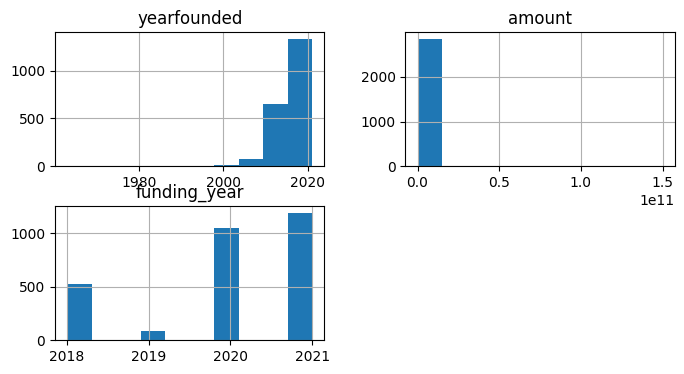

In [630]:
# univariant analysis
df.hist(figsize=(8,4))
plt.show()

### Answering Research Questions

In [631]:
# Applying the goupby function to aggregate count count of startups in particular location or city
location = df.groupby(['headquarter'])['headquarter'].agg(['count']).sort_values('count', ascending=False)

location.head(5)


,count
headquarter,
Bangalore,916
Mumbai,468
Gurugram,318
New Delhi,318
Chennai,106


### QU1. What is the location with most start ups

Text(0.5, 1.0, 'Location with most start ups')

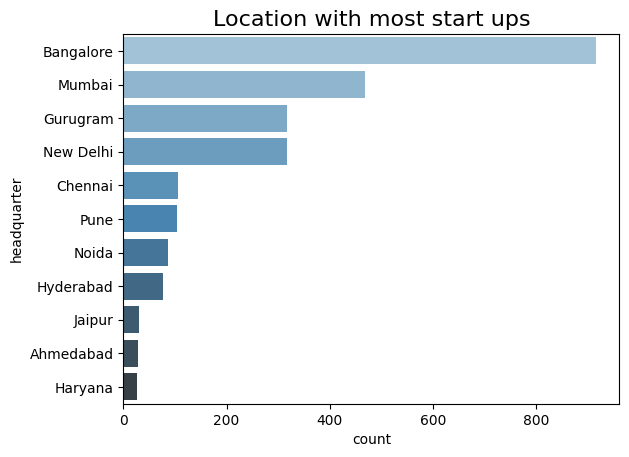

In [632]:
sns.barplot(y=location[:11].index, x= (location['count'])[:11], palette='Blues_d')

plt.title('Location with most start ups', fontsize=16)

Bangalore has most startups with their headquarters in that location with a count of 923, followed by Mumbai with 474

### Qu2 What is the distribution of funding per location/city

In [633]:
# Using  groupby to aggregate funding at the locations
funding_per_city = df.groupby('headquarter')['amount'].agg(['sum']).sort_values('sum', ascending=False)
funding_per_city


,sum
headquarter,
Mumbai,2.309137e+11
Bangalore,2.461889e+10
Gurugram,7.052304e+09
New Delhi,4.438866e+09
California,3.081300e+09
...,...
Panchkula,1.000000e+05
Dhingsara,1.000000e+05
Ranchi,1.000000e+05


Text(0.5, 1.0, 'Distribution of funding per city/location')

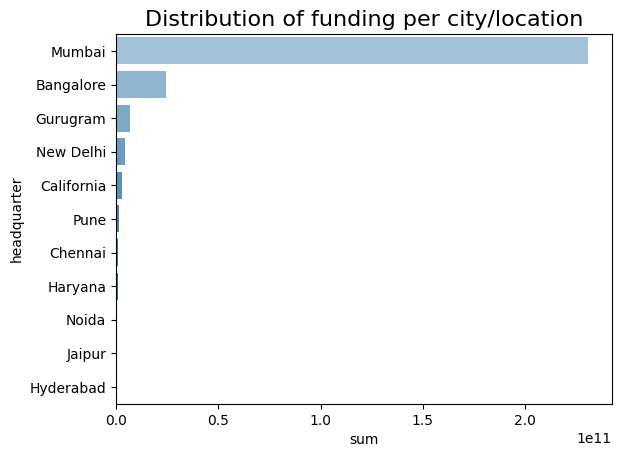

In [634]:
sns.barplot(y=funding_per_city[:11].index,palette='Blues_d', x =(funding_per_city['sum'])[:11])

plt.title('Distribution of funding per city/location', fontsize=16)

Mumbai is receiving a lot of investment funding even though Bangalore has more start ups. This suggest that the amount of funding for some start ups in Mumbai is huge as compared to Bangalore

### QU3 Which Sector received the most funding/Investment

In [635]:
# Grouping sectors according to amount received
SectorAmount=(df.groupby('sector')['amount'].sum().sort_values(ascending=False).reset_index().head(10))
SectorAmount

,sector,amount
0,Technology,1.678121e+11
1,Retail,7.054838e+10
2,Finance,9.185058e+09
3,Multinational conglomerate company,2.200000e+09
4,Automotive,1.979720e+09
5,Hospitality,1.628890e+09
6,Innovation Management,1.000000e+09
7,"Food Delivery, Food Processing, Internet",1.000000e+09
8,Sports,8.515400e+08
9,Food delivery,8.000000e+08


Text(0.5, 1.0, 'sector with most funding/investment')

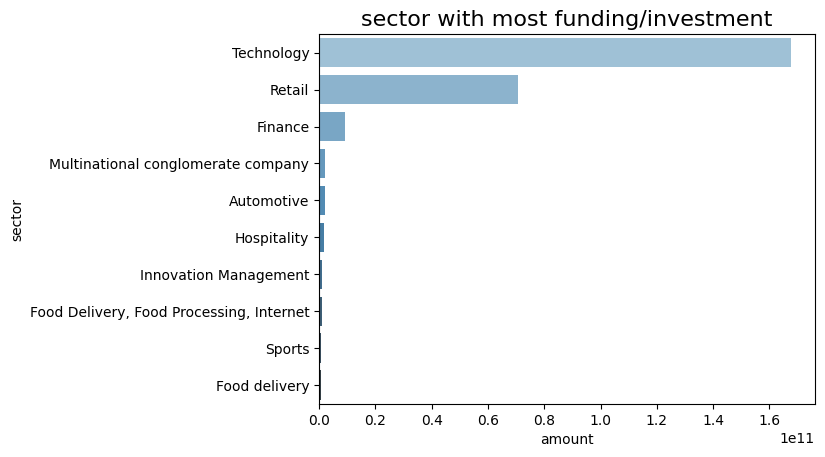

In [636]:
sns.barplot( y= 'sector', x= 'amount', palette='Blues_d', data= SectorAmount)
plt.title('sector with most funding/investment', fontsize=16)


Technology is the most financed sector or sector that receives th most investment which supports the initial hypothesis. given that we are in the digital age, its not far fetched

### Qu4 What is the most common investment type

In [637]:
#Grouping by stage of investment and company name whiles aggregating the count of stage
investment_types= df.groupby(['stage'])['companyname'].agg(['count']).sort_values('count',ascending=False)

investment_types.head(5)





,count
stage,
Seed,599
Series A,304
Pre-series A,208
Series B,134
Series C,113


Text(0.5, 1.0, '5 most common investment type')

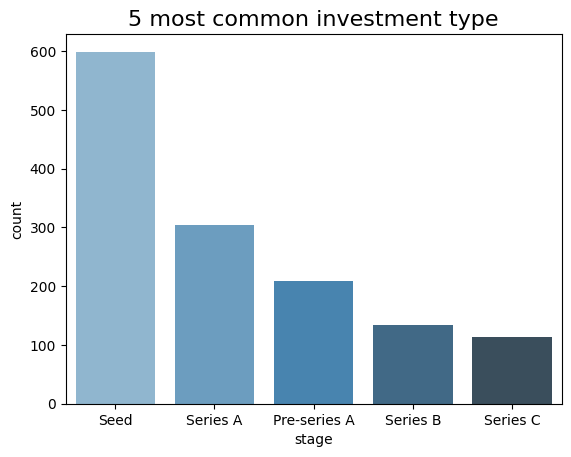

In [638]:
sns.barplot(y='count', x='stage',  palette='Blues_d', data= investment_types.head(5))
plt.title('5 most common investment type', fontsize=16)




The seed stage turns out to be the most common investment type. This goes to show that most investors will prefer giving seed funds as compared to investing in other stages of a startup

### Qu5 What is the number of start_ups per Funding Year

In [639]:
# Estimating number of companies that received funding each year from 2018-2021
start_up_year= df.groupby(['funding_year'])['companyname'].agg(['count']).sort_values('count',ascending=False)

start_up_year





,count
funding_year,
2021,1190
2020,1052
2018,525
2019,89


Text(0.5, 1.0, 'Number of start ups per funding year')

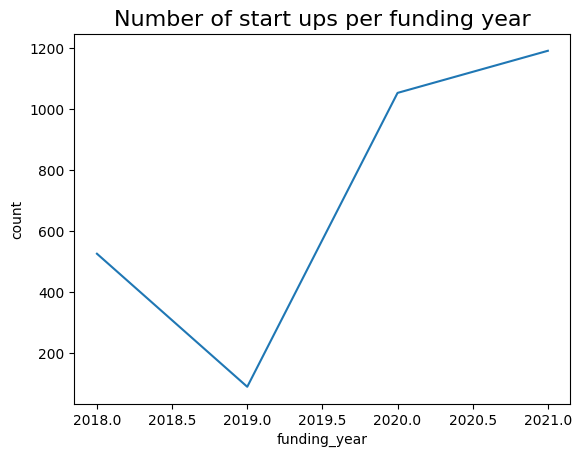

In [640]:
sns.lineplot(data=start_up_year, y="count", x="funding_year")
plt.title('Number of start ups per funding year', fontsize=16)

Funding began in 2018 on a good note, then droped in 2019, gained momentum again and increased thereof through 2020 to 2021.Perhaps Covid slowed down the funding but then 2021 received the most funds

### Conclusion
In conclusions, given the dataset that was explored, the  start-ups in India that received most funds were in the technology sector 

In India, location counts as investors send funds to Mumbai and Bangalore the most. Setting up a startup in Bangalore or Mumbai, there is a strong likelihood that it will get funding quicker

Funding increases as the years go by

There is more funding geared towards the seed stage of a business.
